# **An Overview of Poverty distribution vs Economic Freedom**

Recentrly I saw the graphic below, from Our World in Data Orgaanization that shows the "Distribution of population between different poverty thresholds, World, 1990 to 2019", available [here](https://ourworldindata.org/grapher/distribution-of-population-poverty-thresholds). The graphic raised many questions about how much of this came from neoliberalism policies or from more repressed countries, especially from China.

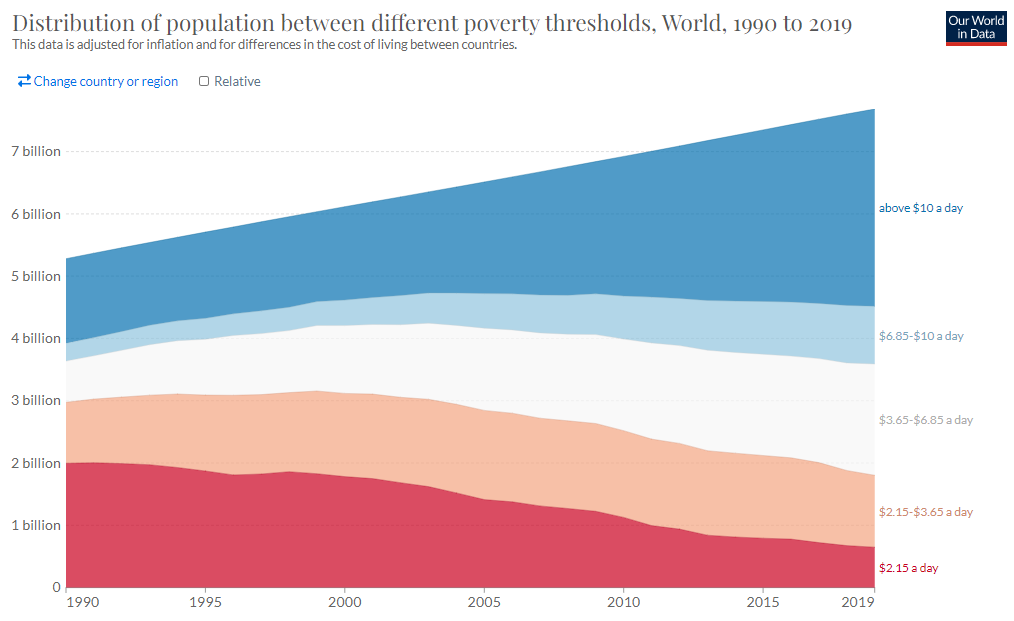

So I decide prepare another point of view, comparing for the average poverty in each country with the economic freedom index, calculated by The Heritage Foundation a available [here](https://indexdotnet.azurewebsites.net/index/explore?view=by-region-country-year&countryids=&regionids=&yearids=).


## **Preparing the data**

Let's begin doing some basic things to begin, as import some libraries, read data files and save as dataframes and check them.

In [1]:
# Importing libraries
from numpy import median
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Readind, saving, rename columns and checking the Distribution of poverty data
url = 'https://raw.githubusercontent.com/dknorrmiller/dknorrmiller/main/Ind%20Project%20-%20Poverty%20distribution%20vs%20Economic%20Freedom/distribution-of-population-poverty-thresholds.csv'
poverty = pd.read_csv(url)
poverty = poverty.rename(columns={'Entity': 'Country'})
poverty.head()

,Country,Code,Year,$10 - total number of people above poverty line,$6.85-$10 - total number of people between poverty lines,$3.65-$6.85 - total number of people between poverty lines,$2.15-$3.65 - total number of people between poverty lines,$2.15 - total number of people below poverty line
0,Albania,ALB,1996,772243,878963,1234921,264962,16944
1,Albania,ALB,2002,710731,750978,1241842,314122,33337
2,Albania,ALB,2005,950031,843959,997981,201716,17800
3,Albania,ALB,2008,1097318,864654,870320,109130,5892
4,Albania,ALB,2012,1013331,823558,924135,121374,18003


The data available at Heritage foundation wasn't easily downloadable for all years, so the file used here was saved manually and has a little previous manipulation did by myself in using a spreadsheet (just dropped columns that isn't gone to be used and duplicate column names, but the "Overall Score" has alredy been given).

In [7]:
# Readind, saving, renaming columns and checking the Economic freedom data
url2 = 'https://raw.githubusercontent.com/dknorrmiller/dknorrmiller/main/Ind%20Project%20-%20Poverty%20distribution%20vs%20Economic%20Freedom/Economic%20Freedom%20Index.csv'
econ_free = pd.read_csv(url2)
econ_free = econ_free.rename(columns={'Name': 'Country', 'Index Year': 'Year'})
econ_free.head()

,Country,Year,Overall Score
0,Afghanistan,1995,NaN
1,Afghanistan,1996,NaN
2,Afghanistan,1998,NaN
3,Afghanistan,1997,NaN
4,Afghanistan,2000,NaN


## **Manipulating Poverty data**

For synthesize the distribution of poverty in a single variable, I'll calculate the number of people multiplied by the value (or average value) that name the column, and than, create a new column with the average of each row.

In [ ]:
# Creating a list of columns with poverty population data
col_list = ['$10 - total number of people above poverty line', '$6.85-$10 - total number of people between poverty lines', '$3.65-$6.85 - total number of people between poverty lines', 
            '$2.15-$3.65 - total number of people between poverty lines', '$2.15 - total number of people below poverty line']
# Creatiing a new column with the total population and checking it
poverty['Total Population'] = poverty[col_list].sum(axis=1)
poverty.head()

,Country,Code,Year,$10 - total number of people above poverty line,$6.85-$10 - total number of people between poverty lines,$3.65-$6.85 - total number of people between poverty lines,$2.15-$3.65 - total number of people between poverty lines,$2.15 - total number of people below poverty line,Total Population
0,Albania,ALB,1996,772243,878963,1234921,264962,16944,3168033
1,Albania,ALB,2002,710731,750978,1241842,314122,33337,3051010
2,Albania,ALB,2005,950031,843959,997981,201716,17800,3011487
3,Albania,ALB,2008,1097318,864654,870320,109130,5892,2947314
4,Albania,ALB,2012,1013331,823558,924135,121374,18003,2900401


In [ ]:
# Creating a new column with the average weighted by population in each poverty threshold, considering the a mean value when the class is a interstice of two values and checking it
poverty['Weighted Average'] = (poverty['$10 - total number of people above poverty line']*10 + poverty['$6.85-$10 - total number of people between poverty lines']*8.425 + 
                               poverty['$3.65-$6.85 - total number of people between poverty lines']*5.25 + poverty['$2.15-$3.65 - total number of people between poverty lines']*2.9 + 
                               poverty['$2.15 - total number of people below poverty line']*2.15)/poverty['Total Population']
poverty

,Country,Code,Year,$10 - total number of people above poverty line,$6.85-$10 - total number of people between poverty lines,$3.65-$6.85 - total number of people between poverty lines,$2.15-$3.65 - total number of people between poverty lines,$2.15 - total number of people below poverty line,Total Population,Weighted Average
0,Albania,ALB,1996,772243,878963,1234921,264962,16944,3168033,7.075636
1,Albania,ALB,2002,710731,750978,1241842,314122,33337,3051010,6.862186
2,Albania,ALB,2005,950031,843959,997981,201716,17800,3011487,7.462530
3,Albania,ALB,2008,1097318,864654,870320,109130,5892,2947314,7.856718
4,Albania,ALB,2012,1013331,823558,924135,121374,18003,2900401,7.693483
...,...,...,...,...,...,...,...,...,...,...
2358,Zambia,ZMB,2010,503461,442840,1382352,1963137,9314196,13605986,3.067878
2359,Zambia,ZMB,2015,782105,687191,2095933,2571804,9742337,15879370,3.338831
2360,Zimbabwe,ZWE,2011,1430584,1413244,3879640,3388252,2782603,12894323,4.838490
2361,Zimbabwe,ZWE,2017,1073267,1189068,3206858,3897628,4869778,14236599,4.169515


## **Cleaning the data and join both dataframes**

For easily reading the new dataframe, let's drop some columns that is no longer be used, then, joining both dataframes.

In [ ]:
# Dropping the columns that won't be used and checking again
col_list.append('Code'); col_list.append('Total Population')
poverty_droped = poverty.drop(col_list, axis=1)
poverty_droped.head()

,Country,Year,Weighted Average
0,Albania,1996,7.075636
1,Albania,2002,6.862186
2,Albania,2005,7.462530
3,Albania,2008,7.856718
4,Albania,2012,7.693483


The rows in Poverty Distribution dataframe that doesn't have a corresponding row in Economic Freedom datafram will be dropped in the join process.

The rows that has any unavailable data will be dropped too.

In [ ]:
# Joining both dataframes 
poverty_EconFree = poverty_droped.merge(econ_free, on=['Country', 'Year'] )
# Dropping rows with that aren't with all data needed and checking the new dataframe
poverty_EconFree = poverty_EconFree.dropna()
poverty_EconFree

,Country,Year,Weighted Average,Overall Score
0,Albania,1996,7.075636,53.8
1,Albania,2002,6.862186,56.8
2,Albania,2005,7.462530,57.8
3,Albania,2008,7.856718,62.4
4,Albania,2012,7.693483,65.1
...,...,...,...,...
1589,Zambia,2010,3.067878,58.0
1590,Zambia,2015,3.338831,58.7
1591,Zimbabwe,2011,4.838490,22.1
1592,Zimbabwe,2017,4.169515,44.0


In [ ]:
# Calculating the correlation between both variables
poverty_EconFree[['Weighted Average', 'Overall Score']].corr()

,Weighted Average,Overall Score
Weighted Average,1.000000,0.570801
Overall Score,0.570801,1.000000


Here we see that both variables have a moderate positive correlation of 0.57

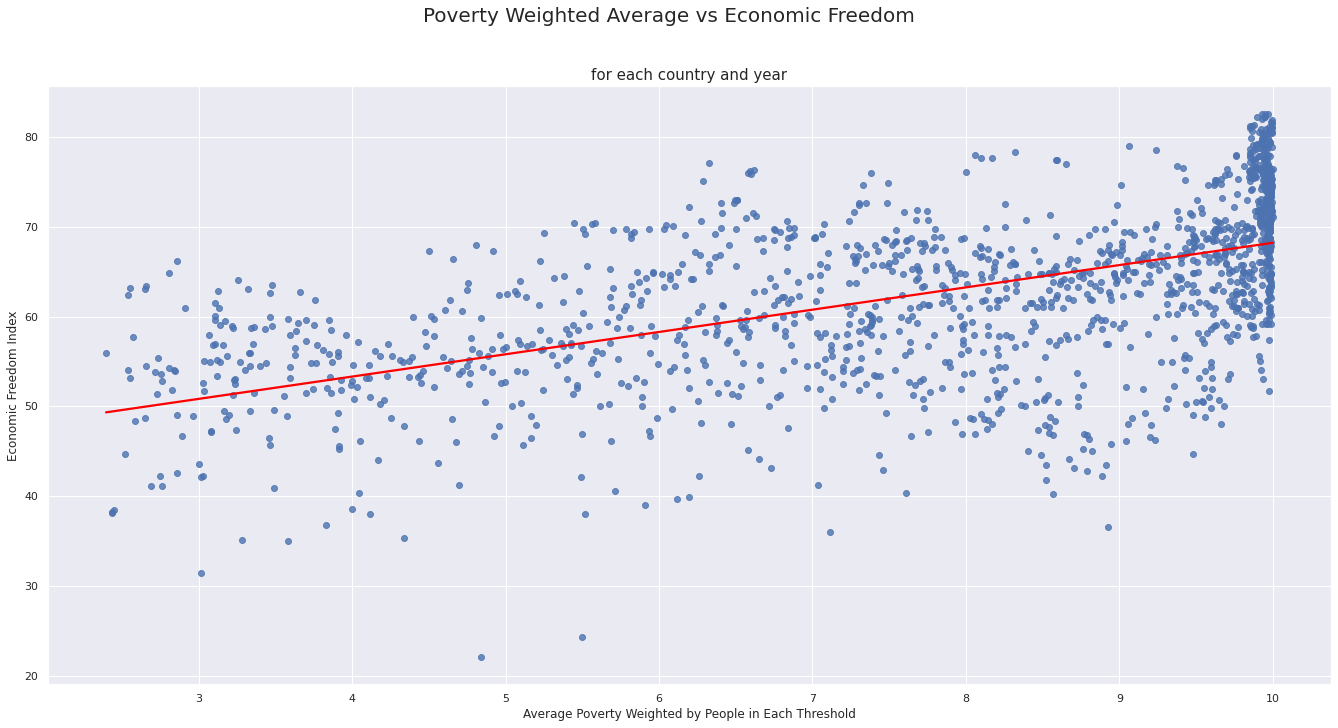

In [ ]:
# Ploting a graphic
sns.regplot(data=poverty_EconFree, x='Weighted Average', y='Overall Score', line_kws={"color": "red"}, ci=None) # Creating the graphic
# Setting title, subtitle a axis labels
plt.suptitle("Poverty Weighted Average vs Economic Freedom", size=20) 
plt.title("for each country and year", size=15) 
plt.xlabel("Average Poverty Weighted by People in Each Threshold") 
plt.ylabel("Economic Freedom Index") 
sns.set(rc={'figure.figsize':(23, 11)}) # Defining the graphic in a big size for better visualization
plt.show()

## **Is China an Outlier?**

Let's create a new session here to take a better look or China data e see if we can consider China as an outlier in how reduce poverty distribution without get more economic freedom.

In [ ]:
# Creating a new column with two categories: China and Not China and checking
poverty_EconFree['Is China?'] = poverty_EconFree['Country']=='China'
poverty_EconFree = poverty_EconFree.replace(True, "China")
poverty_EconFree = poverty_EconFree.replace(False, "Not China")
poverty_EconFree

,Country,Year,Weighted Average,Overall Score,Is China?
0,Albania,1996,7.075636,53.8,Not China
1,Albania,2002,6.862186,56.8,Not China
2,Albania,2005,7.462530,57.8,Not China
3,Albania,2008,7.856718,62.4,Not China
4,Albania,2012,7.693483,65.1,Not China
...,...,...,...,...,...
1589,Zambia,2010,3.067878,58.0,Not China
1590,Zambia,2015,3.338831,58.7,Not China
1591,Zimbabwe,2011,4.838490,22.1,Not China
1592,Zimbabwe,2017,4.169515,44.0,Not China


In [ ]:
# Segregating China in a new dataframe
just_China = poverty_EconFree[poverty_EconFree['Is China?']=="China"]
just_China

,Country,Year,Weighted Average,Overall Score,Is China?
244,China,1996,3.221620,51.3,China
245,China,1999,3.441200,54.8,China
246,China,2002,3.998377,52.8,China
247,China,2005,4.766853,53.7,China
248,China,2008,5.401381,53.1,China
249,China,2010,5.892622,51.0,China
250,China,2011,6.197124,52.0,China
251,China,2012,6.514425,51.2,China
252,China,2013,7.047674,51.9,China
253,China,2014,7.351334,52.5,China


In [ ]:
# Calculating the correlation in China data
just_China[['Weighted Average', 'Overall Score']].corr()

,Weighted Average,Overall Score
Weighted Average,1.000,0.412
Overall Score,0.412,1.000


In [ ]:
poverty_EconFree['Weighted Average'].median()

8.55064595849085

Here we can see how China still have a positive correlation between the Economic Freedom and reduction of poverty, but weaker than the general data.

Below is exposed both variables in a line graphic.

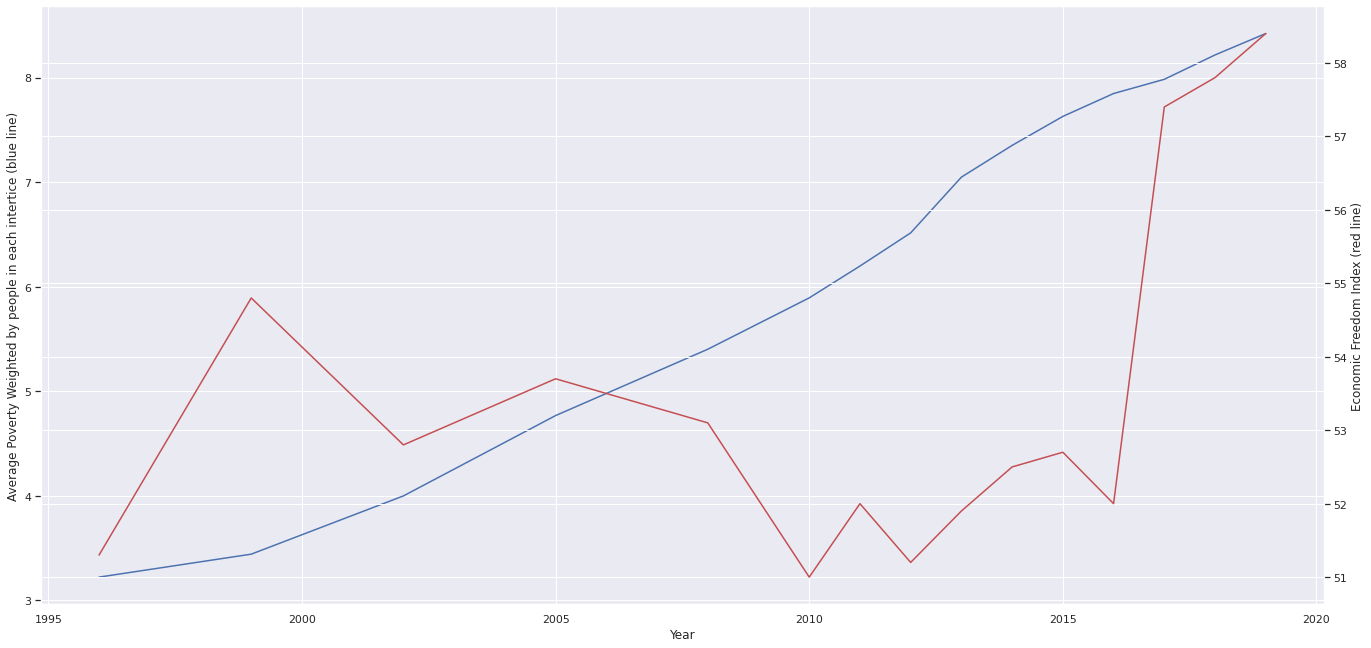

In [ ]:
# Ploting the two variables in line graphic
sns.lineplot(data=just_China, x='Year', y='Weighted Average') #Creating a line graphic between Year e Weighted Average of poverty distribution
plt.ylabel("Average Poverty Weighted by people in each intertice (blue line)") # Changing Y axis label
ax2 = plt.twinx() # Creating a new Y axis
sns.lineplot(data=just_China, x='Year', y='Overall Score', color='r') # Filling the second Y axis ith the Overall Score of Economic Index, defined a red line for it
plt.ylabel("Economic Freedom Index (red line)") # Changing second Y axis label
plt.show()

Finally, here is a graphic of dots again, with evidence on China.

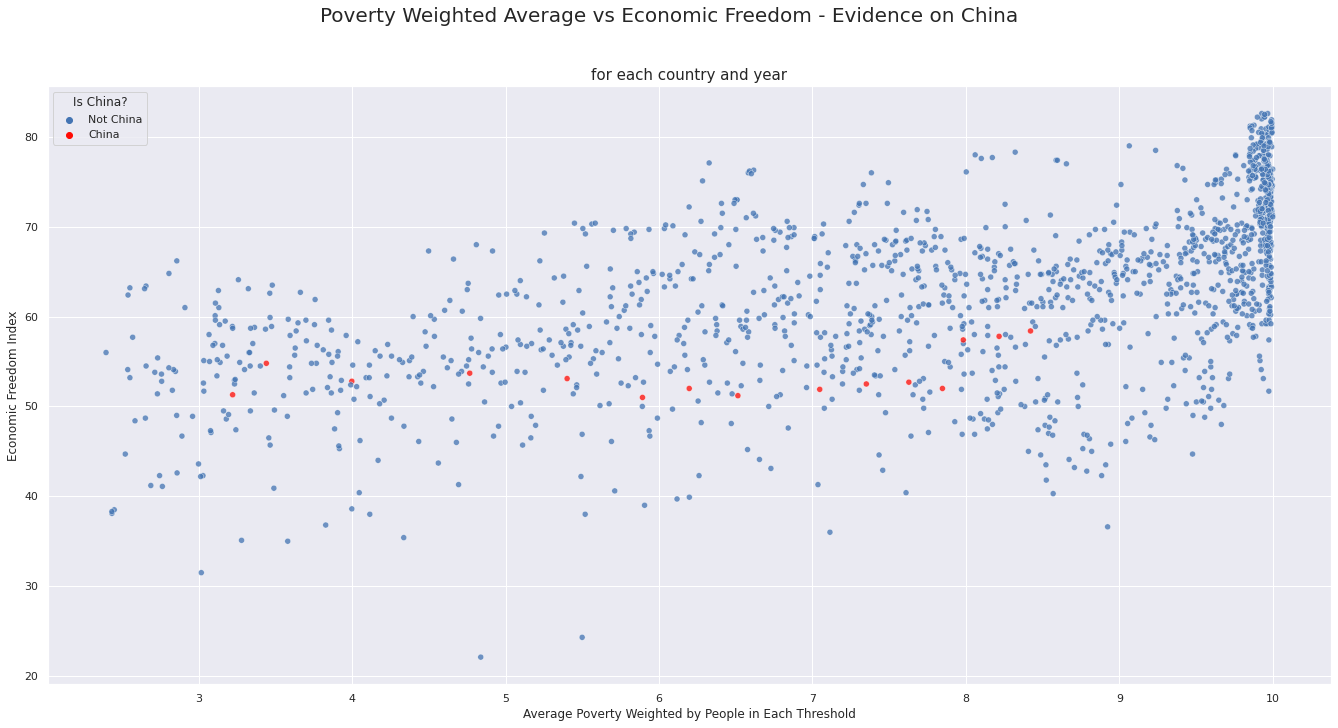

In [ ]:
# Plotting a dot graphic with evidence in China data
palette = sns.set_palette(sns.color_palette(["#4374B3", "#FF0B04"])) # Defining the colors to be used, necessary for the evidence on China
sns.scatterplot(data=poverty_EconFree, x='Weighted Average', y='Overall Score', hue='Is China?', palette=palette, alpha=0.75) # Creating the graphic with China in evidence
# Setting title, subtitle a axis labels
plt.suptitle("Poverty Weighted Average vs Economic Freedom - Evidence on China", size=20)
plt.title("for each country and year", size=15)
plt.xlabel("Average Poverty Weighted by People in Each Threshold")
plt.ylabel("Economic Freedom Index")
sns.set(rc={'figure.figsize':(23, 11)}) # Defining the graphic in a big size for better visualization
plt.show()

## **Conclusion**

Despite we have seen China achived a great reduction on poverty distribution, we also seen that they aren't exatally an outlier for two reasons:
- Even China is increasin their Economic Freedom;
- On data seen here, their last year (also the best) are still behind the median.
   